In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [3]:
df.shape

(12283, 12)

In [4]:
len(df.fullVisitorId.unique())

9996

In [5]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [6]:
df = pd.read_csv('train.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [7]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

In [8]:
df.device.iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [9]:
import json

In [10]:
json.loads(df.device.iloc[0])

{'browser': 'Chrome',
 'browserSize': 'not available in demo dataset',
 'browserVersion': 'not available in demo dataset',
 'deviceCategory': 'desktop',
 'flashVersion': 'not available in demo dataset',
 'isMobile': False,
 'language': 'not available in demo dataset',
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset'}

In [11]:
pd.DataFrame([json.loads(linha) for linha in df.device])

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [12]:
dicionarios = ['device', 'geoNetwork', 'trafficSource', 'totals']

In [13]:
for coluna in dicionarios:
  df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))
  

In [14]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""n

In [15]:
df = df.drop(dicionarios, axis=1)
df

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,not available in demo dataset,phonevision.com.ar,not available in demo dataset,not available in demo dataset,not available in demo dataset,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),google,organic,(not provided),{'criteriaParameters': 'not avail

In [16]:
df = df.drop('adwordsClickInfo', axis=1)

In [17]:
coluna_na = []

In [18]:
for coluna in df.columns:
  print(coluna + ': ' + str(len(df[coluna].unique())))
  if len(df[coluna].unique()) == 1:
    coluna_na.append(coluna)

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147


In [19]:
coluna_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [20]:
df = df.drop(coluna_na, axis=1)
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN


In [21]:
quant = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [22]:
for coluna in quant:
  df[coluna] = pd.to_numeric(df[coluna])

In [23]:
df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                object
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
dtype: object

In [24]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,desktop,Asia,Southeast Asia,Singapore,(not set),(not set),Singapore,unknown.unknown,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,desktop,Europe,Eastern Europe,Poland,not available in demo dataset,not available in demo dataset,not available in demo dataset,tpnet.pl,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,desktop,Americas,South America,Argentina,Buenos Aires,(not set),Buenos Aires,phonevision.com.ar,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcast.net,(not set),google,organic,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,att.net,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,NaN


In [25]:
df.transactionRevenue

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12278   NaN
12279   NaN
12280   NaN
12281   NaN
12282   NaN
Name: transactionRevenue, Length: 12283, dtype: float64

In [26]:
df.transactionRevenue.value_counts()

19190000.0     3
33590000.0     3
13590000.0     3
55990000.0     2
18990000.0     2
              ..
374850000.0    1
74850000.0     1
291070000.0    1
23960000.0     1
16780000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

In [27]:
df.transactionRevenue.isna().sum()

12119

In [28]:
df.transactionRevenue = df.transactionRevenue.fillna(0)

In [29]:
df.transactionRevenue

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12278    0.0
12279    0.0
12280    0.0
12281    0.0
12282    0.0
Name: transactionRevenue, Length: 12283, dtype: float64

In [30]:
df.transactionRevenue.value_counts()

0.0            12119
33590000.0         3
13590000.0         3
19190000.0         3
31490000.0         2
               ...  
374850000.0        1
74850000.0         1
291070000.0        1
23960000.0         1
372650000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

In [31]:
df.transactionRevenue = df.transactionRevenue / 1000000

In [32]:
df.transactionRevenue.value_counts()

0.00      12119
19.19         3
13.59         3
33.59         3
27.19         2
          ...  
253.77        1
239.88        1
88.05         1
112.05        1
26.49         1
Name: transactionRevenue, Length: 147, dtype: int64

In [33]:
df.shape

(12283, 31)

In [34]:
len(set(df.fullVisitorId))

9997

In [35]:
df_quant = df.groupby('fullVisitorId', as_index=False)[quant].sum()

In [36]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [37]:
y = df_quant['transactionRevenue'].copy()

In [38]:
X = df_quant.drop('transactionRevenue', axis=1)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()

In [43]:
reg.fit(X_train, y_train)

LinearRegression()

In [44]:
reg_predict = reg.predict(X_test)

In [45]:
reg_predict

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

In [47]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [48]:
resultados

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655
...,...,...,...
5580,0.0,1.468371,1.468371
1074,0.0,1.723133,1.723133
3063,0.0,1.613110,1.613110
4554,0.0,1.526790,1.526790


In [49]:
resultados[resultados.predict > 0]

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655
...,...,...,...
5580,0.0,1.468371,1.468371
1074,0.0,1.723133,1.723133
3063,0.0,1.613110,1.613110
4554,0.0,1.526790,1.526790


In [50]:
import numpy as np

In [51]:
np.mean((reg_predict - y_test) ** 2) #MSE mean square error

807.245929682092

In [52]:
np.sqrt(np.mean((reg_predict - y_test) ** 2)) #RMSE root

28.412073660366502

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y_test, reg_predict)

807.2459296820928

In [55]:
np.sqrt(mean_squared_error(y_test, reg_predict))

28.412073660366516

In [56]:
np.mean(df_quant.transactionRevenue)

1.778953686105831

In [57]:
np.std(df_quant.transactionRevenue)

25.129905708017944

In [58]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


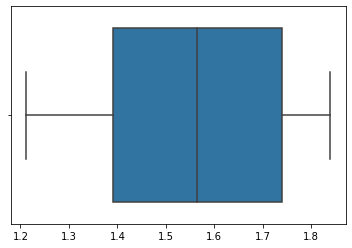

In [59]:
sns.boxplot(reg_predict)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


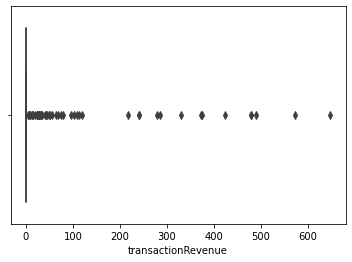

In [60]:
sns.boxplot(y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


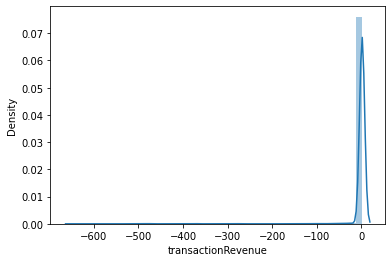

In [61]:
sns.distplot(reg_predict - y_test)

In [62]:
visitas_ultima = df.groupby('fullVisitorId', as_index=False)

In [63]:
visitas_ultima = visitas_ultima['visitNumber'].max()

In [64]:
visitas_ultima.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [65]:
usuarios_visitas_unicos = df.drop_duplicates(subset=['fullVisitorId','visitNumber'])

In [66]:
usuarios_visitas_unicos.shape

(12270, 31)

In [67]:
visitas = pd.merge(visitas_ultima, usuarios_visitas_unicos, left_on=['fullVisitorId','visitNumber'], right_on=['fullVisitorId','visitNumber'], how='left')

In [68]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


In [69]:
visitas_primeira = df.groupby('fullVisitorId', as_index=False)

In [70]:
visitas_primeira = visitas_primeira['visitNumber'].min()

In [71]:
visitas_primeira.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [72]:
visitas_primeira = visitas_primeira.set_index('fullVisitorId')

In [73]:
visitas = visitas.join(visitas_primeira, how='left', on='fullVisitorId', rsuffix='_primeira')

In [74]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,subContinent,country,region,metro,city,networkDomain,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue,visitNumber_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6


In [75]:
visitas = pd.merge(visitas, usuarios_visitas_unicos, left_on=['fullVisitorId','visitNumber_primeira'], 
                   right_on=['fullVisitorId','visitNumber'], how='left',suffixes=['_ultima','_primeira'])

In [76]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,hits_ultima,pageviews_ultima,bounces_ultima,newVisits_ultima,transactionRevenue_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,hits_primeira,pageviews_primeira,bounces_primeira,newVisits_primeira,transactionRevenue_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not a

In [77]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [78]:
for coluna in quant:
  visitas.drop(coluna + '_ultima', axis=1, inplace=True)
  visitas.drop(coluna + '_primeira', axis=1, inplace=True)

In [79]:
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,sessionId_primeira,visitId_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,0002365800130207040_1472974804,1472974804,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,0011056874471185769_1480996024,1480996024,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,0014443856125569702_1475423502,1475423502,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,0017260116665815114_1492707286,1492707286,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [80]:
ids = ['sessionId_ultima','visitId_ultima', 'sessionId_primeira','visitId_primeira']

In [81]:
visitas.drop(ids, axis=1, inplace=True)

In [82]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,continent_primeira,subContinent_primeira,country_primeira,region_primeira,metro_primeira,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [83]:
visitas.columns

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'isMobile_ultima', 'deviceCategory_ultima',
       'continent_ultima', 'subContinent_ultima', 'country_ultima',
       'region_ultima', 'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'visitNumber_primeira',
       'channelGrouping_primeira', 'date_primeira', 'visitNumber_primeira',
       'visitStartTime_primeira', 'browser_primeira',
       'operatingSystem_primeira', 'isMobile_primeira',
       'deviceCategory_primeira', 'continent_primeira',
       'subContinent_primeira', 'country_primeira', 'region_primeira',
       'metro_primeira', 'city_primeira', 'networkDomain_primeira',
       'campaign_primeira', 'source_primeira', 'mediu

In [84]:
geo = ['city_primeira','continent_primeira', 'metro_primeira', 'country_primeira','region_primeira','networkDomain_primeira','subContinent_primeira']

In [85]:
visitas.drop(geo, axis=1, inplace=True)

In [86]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [87]:
visitas = pd.merge(visitas, df_quant, left_on=['fullVisitorId'], 
                   right_on=['fullVisitorId'], how='left')

In [88]:
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,20161221,1482388264,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,3,Referral,20161221,3,1482388264,Chrome,Macintosh,False,desktop,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,0.0,10,0.0,10,0.0
9993,9996793353803109760,1,Social,20161130,1480566609,Chrome,Android,True,mobile,Asia,Southeast Asia,Thailand,Nakhon Ratchasima,(not set),(not set),3bb.co.th,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1,Social,20161130,1,1480566609,Chrome,Android,True,mobile,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1.0,1,1.0,1,0.0
9994,9997125062030599880,1,Organic Search,20170112,1484217422,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Or

In [90]:
visitas['tempo_dif'] = visitas.visitStartTime_ultima - visitas.visitStartTime_primeira

In [91]:
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,20161221,1482388264,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,3,Referral,20161221,3,1482388264,Chrome,Macintosh,False,desktop,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,0.0,10,0.0,10,0.0,0
9993,9996793353803109760,1,Social,20161130,1480566609,Chrome,Android,True,mobile,Asia,Southeast Asia,Thailand,Nakhon Ratchasima,(not set),(not set),3bb.co.th,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1,Social,20161130,1,1480566609,Chrome,Android,True,mobile,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1.0,1,1.0,1,0.0,0
9994,9997125062030599880,1,Organic Search,20170112,1484217422,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not set),google,organic,(not pr

In [93]:
visits = df.groupby('fullVisitorId',as_index=False).count().visitNumber.values

In [94]:
visitas['visits'] = visits

In [95]:
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,20161221,1482388264,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,3,Referral,20161221,3,1482388264,Chrome,Macintosh,False,desktop,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,0.0,10,0.0,10,0.0,0,1
9993,9996793353803109760,1,Social,20161130,1480566609,Chrome,Android,True,mobile,Asia,Southeast Asia,Thailand,Nakhon Ratchasima,(not set),(not set),3bb.co.th,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1,Social,20161130,1,1480566609,Chrome,Android,True,mobile,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
9994,9997125062030599880,1,Organic Search,20170112,1484217422,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),(not se

In [99]:
visitas['ano_ultima'] = pd.to_numeric([data[:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

visitas['ano_primeira'] = pd.to_numeric([data[:4] for data in visitas.date_ultima])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

In [100]:
visitas

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1,2017,4,20,2017,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,20161221,1482388264,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,3,Referral,20161221,3,1482388264,Chrome,Macintosh,False,desktop,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,0.0,10,0.0,10,0.0,0,1,2016,12,21,2016,12,21
9993,9996793353803109760,1,Social,20161130,1480566609,Chrome,Android,True,mobile,Asia,Southeast Asia,Thailand,Nakhon Ratchasima,(not set),(not set),3bb.co.th,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1,Social,20161130,1,1480566609,Chrome,Android,True,mobile,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1.0,1,1.0,1,0.0,0,1,2016,11,30,2016,

In [101]:
visitas.drop('fullVisitorId', axis=1, inplace=True)

In [102]:
y = visitas.transactionRevenue.copy()

In [103]:
X = visitas.drop('transactionRevenue', axis=1)

In [104]:
X

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,Ukraine,not available in demo dataset,not available in demo dataset,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1,Social,20160904,1,1472974804,Edge,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0,1,2016,9,4,2016,9,4
1,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,Missouri,Kansas City MO,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1,Organic Search,20160928,1,1475084026,Chrome,Chrome OS,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0,1,2016,9,28,2016,9,28
2,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,Philippines,not available in demo dataset,not available in demo dataset,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1,Social,20161205,1,1480996024,Chrome,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0,1,2016,12,5,2016,12,5
3,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,Romania,Bucharest,(not set),Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1,Social,20161002,1,1475423502,Opera,Windows,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0,1,2016,10,2,2016,10,2
4,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6,Direct,20170420,6,1492707286,Safari,Macintosh,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0,1,2017,4,20,2017,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,3,Referral,20161221,1482388264,Chrome,Macintosh,False,desktop,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,3,Referral,20161221,3,1482388264,Chrome,Macintosh,False,desktop,(not set),mall.googleplex.com,referral,NaN,True,/,NaN,NaN,0.0,10,0.0,10,0,1,2016,12,21,2016,12,21
9993,1,Social,20161130,1480566609,Chrome,Android,True,mobile,Asia,Southeast Asia,Thailand,Nakhon Ratchasima,(not set),(not set),3bb.co.th,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1,Social,20161130,1,1480566609,Chrome,Android,True,mobile,(not set),youtube.com,referral,NaN,NaN,/yt/about/th/,NaN,NaN,1.0,1,1.0,1,0,1,2016,11,30,2016,11,30
9994,1,Organic Search,20170112,1484217422,Safari,iOS,True,mobile,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set

In [109]:
quali = visitas.dtypes[visitas.dtypes == object].keys()

In [116]:
strings = list(X.operatingSystem_ultima.values.astype('str'))

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
lbl = LabelEncoder()

In [117]:
lbl.fit(strings)

LabelEncoder()

In [118]:
lbl.transform(strings)

array([ 9,  3,  9, ..., 11,  1,  9])

In [ ]:
for coluna in quali:
  lbl = LabelEncoder()
  strings = list(X[coluna].values.astype('str'))
  lbl.fit(strings)
  X[coluna] = lbl.transform(strings)

In [120]:
X

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,country_ultima,region_ultima,metro_ultima,city_ultima,networkDomain_ultima,campaign_ultima,source_ultima,medium_ultima,keyword_ultima,isTrueDirect_ultima,referralPath_ultima,adContent_ultima,campaignCode_ultima,visitNumber_primeira,channelGrouping_primeira,date_primeira,visitNumber_primeira,visitStartTime_primeira,browser_primeira,operatingSystem_primeira,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,9,False,0,4,7,135,205,50,286,1652,0,74,6,81,1,174,11,1,1,7,34,1,1472974804,7,9,False,0,0,72,6,80,1,174,10,1,1.0,1,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,138,116,20,120,0,0,23,5,4,1,192,11,1,1,4,58,1,1475084026,5,3,False,0,0,20,5,4,1,192,10,1,0.0,4,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,101,205,50,286,1106,0,74,6,81,1,124,11,1,1,7,126,1,1480996024,5,9,False,0,0,72,6,80,1,124,10,1,0.0,2,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,106,24,0,37,1165,0,74,6,81,1,173,11,1,1,7,62,1,1475423502,15,9,False,0,0,72,6,80,1,173,10,1,1.0,1,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,138,205,50,286,333,0,0,0,81,0,192,11,1,6,2,262,6,1492707286,18,6,False,0,0,0,0,80,0,192,10,1,0.0,2,0.0,2,0,1,2017,4,20,2017,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,3,6,142,1482388264,5,6,False,0,2,11,138,205,50,286,1541,0,47,6,81,0,0,11,1,3,6,142,3,1482388264,5,6,False,0,0,45,6,80,0,0,10,1,0.0,10,0.0,10,0,1,2016,12,21,2016,12,21
9993,1,7,121,1480566609,5,1,True,1,3,15,129,119,0,0,14,0,74,6,81,1,182,11,1,1,7,121,1,1480566609,5,1,True,1,0,72,6,80,1,182,10,1,1.0,1,1.0,1,0,1,2016,11,30,2016,11,30
9994,1,4,164,1484217422,18,11,True,1,2,11,138,205,50,286,0,0,23,5,4,1,192,11,1,1,4,164,1,1484217422,18,11,True,1,0,20,5,4,1,192,10,1,0.0,8,1.0,8,0,1,2017,1,12,2017,1,12
9995,1,4,225,1489504370,5,1,True,1,4,18,45,205,50,286,0,0,23,5,4,1,192,11,1,1,4,225,1,1489504370,5,1,True,1,0,20,5,4,1,192,10,1,1.0,1,1.0,1,0,1,2017,3,14,2017,3,14


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
reg = LinearRegression()

In [123]:
reg.fit(X_train, y_train)

LinearRegression()

In [124]:
reg_predict = reg.predict(X_test)

In [127]:
reg_predict[reg_predict < 0] = 0

In [128]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [129]:
resultados

,revenue,predict,erro
4122,0.0,0.446703,0.446703
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.534308,0.534308
6391,0.0,0.000000,0.000000
...,...,...,...
5580,0.0,3.125500,3.125500
1074,0.0,0.000000,0.000000
3063,0.0,1.205232,1.205232
4554,0.0,0.000000,0.000000


In [130]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,14.087718,-18.402282
5928,74.85,35.163155,-39.686845
8361,424.50,18.069270,-406.430730
8612,55.99,16.509723,-39.480277
416,15.19,22.396676,7.206676
4077,5.97,16.276707,10.306707
8146,27.19,15.318833,-11.871167
4908,372.65,140.985297,-231.664703
9395,29.98,20.180622,-9.799378
8728,101.95,88.666234,-13.283766


In [131]:
np.sqrt(mean_squared_error(y_test, reg_predict))

25.0780419654249

In [132]:
resultados.sum()

revenue    6907.990000
predict    7861.373478
erro        953.383478
dtype: float64

In [133]:
from sklearn.ensemble import GradientBoostingRegressor

In [135]:
gb = GradientBoostingRegressor(random_state=42)

In [136]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [138]:
gb_predict = gb.predict(X_test)

In [139]:
gb_predict[gb_predict < 0] = 0

In [140]:
gb_predict

array([0.04728285, 0.        , 0.        , ..., 0.37650368, 0.19558698,
       0.        ])

In [141]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = gb_predict
resultados['erro'] = gb_predict - y_test

In [142]:
np.sqrt(mean_squared_error(y_test, gb_predict))

24.632494305590168

In [143]:
resultados.sum()

revenue    6907.990000
predict    5670.919767
erro      -1237.070233
dtype: float64